# 학습 목표
파이토치를 이용하여 가장 기본적인 인공 신경망(artificial neural network, ANN)을 만들어보자!

# 목차
- 텐서와 Autograd 패키지
- 경사하강법으로 이미지 복원하기
- 신경망 모델 구현하기

### 1. 텐서와 Autograd

### 1-1) 텐서의 차원 자유자재로 다루기

In [5]:
# 파이토치 import
import torch

텐서 = 숫자들을 일정한 모양으로 배열한 것.

랭크 = 차원

랭크에 따른 형태
- 1 -> 스칼라 / 모양: []
- [1, 2, 3] -> 벡터 / 모양: [3]
- [[1, 2, 3]] -> 행렬 / 모양: [1, 3]
- [[[1, 2, 3]]] -> n랭크 텐서 / 모양: [1, 1, 3]

In [6]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [7]:
print(f"Size: {x.size()}")
print(f"Shape: {x.shape}")
print(f"랭크(차원): {x.ndimension()}")

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


`unsqueeze()`, `squeeze()`, `view()` 함수로 텐서의 랭크와 shape를 인위적으로 바꿀 수 있다!

In [8]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)

print(f"Size: {x.size()}")
print(f"Shape: {x.shape}")
print(f"랭크(차원): {x.ndimension()}")

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


[3, 3] 형태의 랭크 2 텐서의 첫 번째 자리에 1이라는 차원값을 추가하여 [1, 3, 3] 모양의 랭크 3 텐서로 변경.

In [11]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)

print(f"Size: {x.size()}")
print(f"Shape: {x.shape}")
print(f"랭크(차원): {x.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


`squeeze()`, `unsqueeze()` 를 사용해서 차원 수를 늘리고 줄여도 총 원소 수는 유지되는 것을 확인할 수 있다!

`view()` : 원소 수 유지하면서 텐서 크기 변경.

In [12]:
# x를 [3, 3] -> [9] 
x = x.view(9)
print(x)

print(f"Size: {x.size()}")
print(f"Shape: {x.shape}")
print(f"랭크(차원): {x.ndimension()}")

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


`view()` 예시를 하나만 더 살펴보자면,

In [14]:
ex = torch.tensor([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]])

print(f"Size: {ex.size()}")
print(f"Shape: {ex.shape}")
print(f"랭크(차원): {ex.ndimension()}")

Size: torch.Size([2, 2, 3])
Shape: torch.Size([2, 2, 3])
랭크(차원): 3


In [15]:
print(ex.view([-1, 3])) # ex라는 텐서를 (?, 3)의 크기로 변경
print(ex.view([-1, 3]).shape)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


### 1-2) 텐서를 이용한 연산과 행렬곱

In [1]:
import torch

w = torch.randn(5, 3, dtype = torch.float)
x = torch.tensor([[1.0,2.0], [3.0, 4.0], [5.0, 6.0]])
print("w size: ", w.size()) # 5, 3
print("x size: ", x.size())  # 3, 2
print("w: ", w)
print("x: ", x)

w size:  torch.Size([5, 3])
x size:  torch.Size([3, 2])
w:  tensor([[-0.2160, -0.1075, -0.4239],
        [-1.3240, -1.0760, -1.1653],
        [-1.6739,  0.9338, -0.4222],
        [ 0.0161, -0.3775, -0.3342],
        [ 1.5347, -0.6861,  1.4807]])
x:  tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [3]:
b = torch.randn(5, 2, dtype = torch.float)
print("b size: ", b.size())
print("b: ", b)

b size:  torch.Size([5, 2])
b:  tensor([[-0.8994, -1.2410],
        [ 0.3491, -0.0774],
        [-0.8490, -0.2266],
        [-0.5137,  0.0152],
        [ 0.7142, -2.1923]])


In [5]:
# 행렬곱 구하기
wx = torch.mm(w, x)
print(f"wx: {wx}")
print(f"wx size: {wx.size()}")

wx: tensor([[ -2.6579,  -3.4053],
        [-10.3782, -13.9434],
        [ -0.9836,  -2.1459],
        [ -2.7875,  -3.4832],
        [  6.8798,   9.2090]])
wx size: torch.Size([5, 2])


In [7]:
# 행렬 덧셈
result = wx + b
print(f"result: {result}")
print(f"result size: {result.size()}")

result: tensor([[ -3.5574,  -4.6463],
        [-10.0291, -14.0208],
        [ -1.8326,  -2.3725],
        [ -3.3012,  -3.4680],
        [  7.5939,   7.0167]])
result size: torch.Size([5, 2])


### 1-3) Autograd

Autograd = 자동 기울기

- 거리(distance) = 정답과 머신러닝 모델이 예측한 결과의 **차이**
- 오차(loss) = 학습 데이터로 계산한 **거리들의 평균**

오차 최소화하는 알고리즘 중 가장 유명하고 많이 쓰이는 것 = **경사하강법**

- 값이 1.0인 스칼라 텐서 w 정의 후, 수식 w에 대해 미분하여 기울기 계산하기

`requires_grad = True`로 설정하면 파이토치 Autograd 기능이 계산할 때 자동으로 w에 대한 미분값을 w.grad 에 저장함.

In [29]:
w = torch.tensor(1.0, requires_grad = True)

In [30]:
a = w*3

In [31]:
l = a**2

현재 상황 : `l = a**2 = (3w)**2 = 9 * (w**2)`

l을 w로 미분하려면 연쇄법칙 사용해야함. -> `backward()` 함수 사용

📌 좀 더 알아보기 
- requires_grad
- backward()

In [36]:
print((w.is_leaf == True) and (w.grad_fn == None))
print((a.is_leaf == True) and (a.grad_fn == None))
print((l.is_leaf == True) and (l.grad_fn == None))
print("---")
print(a.is_leaf)
print(a.grad_fn)
print("---")
print(l.is_leaf)
print(l.grad_fn)

True
False
False
---
False
---
False


- leaf 텐서 = 기존 연산 기록이 없는 텐서.
- w는 leaf 텐서이다. (w.is_leaf == True, w.grad_fn == None)
- a와 l은 leaf 텐서가 아니다.

어떤 연산을 했느냐에 따라 `grad_fn`에 `AddBackward0`, `SubBackward0`, `MulBackward0`, `DivBackward0`, `PowBackward0` 와 같이 저장되어 있는 것을 확인할 수 있다.

backward()는 leaf 텐서의 `.grad`, 즉 기울기를 계산한다.

이를 계산하기 위해서는 전제조건이 필요하다.
1. 역미분을 수행하려는 하나 이상의 leaf 텐서가 `requires_grad = True` 일 것
2. `backward()`를 호출하는 텐서는 스칼라일 것.
3. 미분 가능한 연산일 것. (미분 불가능한 연산 또는 점의 grad는 계산 결과를 신뢰할 수 없다.)



In [35]:
l.backward()
print(f"l을 w로 미분한 값은 {w.grad}")

l을 w로 미분한 값은 18.0


`backward()`를 실행하면 `.grad_fn`에 기록된 정보를 시작으로 마지막 연산부터 거슬러 올라가며 역미분을 수행한다.

|  | leaf 텐서 | non-leaf 텐서|
|------|-----------|--------------|
| is_leaf | True | False |
| grad | 존재 | None |
|grad_fn | None | 존재 |

이 때 backward 경로 상에 있는 non-leaf 텐서는 leaf 텐서의 grad 를 계산하기 위해 항상 `requires_grad = True` 여야한다.


### 2. 경사하강법으로 이미지 복원하기

### 2-1) 오염된 이미지 문제

이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100x100 픽셀의 오염된 이미지가 만들어졌다. 오염된 이미지와 weird_function() 함수를 활용해 원본 이미지를 복원하자.

### 2-2) 오염된 이미지를 복원하는 방법
weird_function()을 살펴보고 반대로 동작하는 함수를 구현하는 것도 방법일 수 있지만, 함수 하나하나 뜯어보는건 너무 까다로운 작업.

-> 크기 같은 랜덤 텐서 생성하고 얘를 weird_function()에 넣었을 때, 결과(=가설)가 오염된 이미지와 같다면, `랜덤 텐서 = 원본 이미지`가 된다!

### 2-3) 문제 해결과 코드 구현

In [37]:
import torch
import pickle
import matplotlib.pyplot as plt

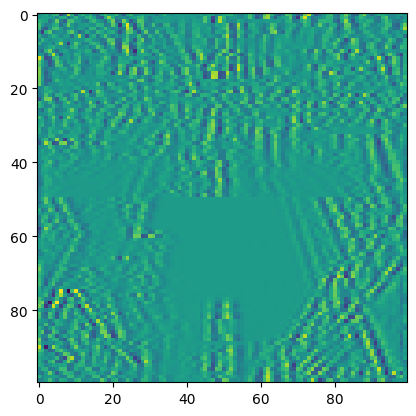

In [41]:
img_path = "3-min-pytorch/03-파이토치로_구현하는_ANN"

# 오염된 이미지 불러오기
broken_image = torch.FloatTensor( pickle.load(open(img_path + "/broken_image_t.p", "rb"), encoding = "latin1" ) )

# 오염된 이미지 출력하여 확인
plt.imshow(broken_image.view(100, 100))

In [42]:
# weird_function
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

코드를 이해하여 반대로 실행하지 않고, 머신러닝을 이용하여 이미지를 복원해보자

In [43]:
# 무작위 텐서를 weird_function 함수에 입력해 얻은 가설 텐서와
# 오염된 이미지 사이의 오차 구하는 함수 구현

def distance_loss(h, broken_image):
    return torch.dist(h, broken_image)

`torch.dist()` : 두 텐서 사이의 거리 구하는 함수

In [44]:
# 오염된 이미지와 크기가 같은 랜덤 텐서 생성하기
random_tensor = torch.randn(100*100, dtype = torch.float)

경사하강법은 여러 번 반복해서 이루어짐.
한 반복에서 최솟점으로 얼마나 많이 이동하는지를 정하는 매개변수를 **학습률**이라고 한다. 우선 0.8로 설정.

경사하강법의 몸체인 for 반복문 구현하기.

loss at 0 = 12.388728141784668
loss at 1000 = 1.1533136367797852
loss at 2000 = 0.5374141335487366
loss at 3000 = 0.3740074932575226
loss at 4000 = 0.29787084460258484
loss at 5000 = 0.25086307525634766
loss at 6000 = 0.21650207042694092
loss at 7000 = 0.18881291151046753
loss at 8000 = 0.1651799976825714
loss at 9000 = 0.14424003660678864
loss at 10000 = 0.12517927587032318
loss at 11000 = 0.10746888816356659
loss at 12000 = 0.09074938297271729
loss at 13000 = 0.07477107644081116
loss at 14000 = 0.05935865640640259
loss at 15000 = 0.04438850283622742
loss at 16000 = 0.02977452427148819
loss at 17000 = 0.021152310073375702
loss at 18000 = 0.021165795624256134
loss at 19000 = 0.021167615428566933


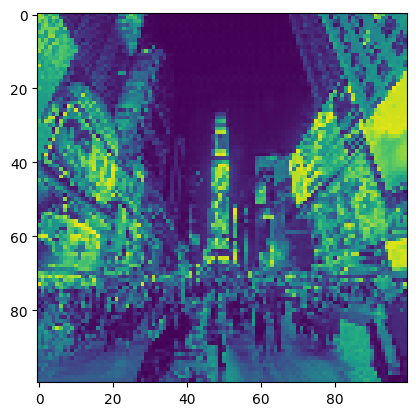

In [48]:
lr = 0.8

# 1. 오차 함수를 random_tensor로 미분해야하기 때문에 `requires_grad`를 True로 설정한다.
for i in range(20000):
    random_tensor.requires_grad_(True)
    
    # 2. 랜덤 텐서를 `weird_function()`에 통과시켜 가설을 구하고,
    # `distance_loss()` 함수에 가설과 오염된 이미지를 입력해 오차를 계산한다.
    # 그 후, `loss.backward()` 함수를 호출하여 loss를 random_tensor로 미분한다.
    
    hypoth = weird_function(random_tensor)
    loss = distance_loss(hypoth, broken_image)
    loss.backward()
    
    # 3. 직접 경사하강법을 구현하기 위해 torch.no_grad() 함수를 이용해서
    # 자동 기울기 계산 비활성화.
    
    with torch.no_grad():
        # 4. random_tensor.grad 에는 loss.backward() 함수에서 계산한 loss 의 기울기가 들어있음.
        # 이 방향의 반대쪽으로 random_tensor를 학습률(lr)만큼 이동.
        random_tensor = random_tensor - lr * random_tensor.grad
    
    # 반복문 1000번 마다 오차 출력
    if i % 1000 == 0:
        print(f"loss at {i} = {loss.item()}")

# random_tensor 가 제대로 복원되었는지 확인
plt.imshow(random_tensor.view(100, 100).data)

### 3. 신경망 모델 구현하기

### 3-1) 인공 신경망(ANN)

- 입력층 : 자극 입력받는 감각 기관
- 은닉층(=중간층)
- 출력층 : 마지막 뉴런

각 층에 존재하는 한 단위의 인공뉴런 = **노드**

생물학적 신경세포는 인접 신경세포에 자극을 전달하기 전, 입력받은 자극에 여러 화학적 처리를 가한다.

이와 유사하게 인공 신경망에서는 화학적 처리 대신 특정 수학 연산을 시행한다.

각 층에 존재하는 매개변수인 **가중치**에 행렬곱시키고, **편향**을 더해주는 것.

- 가중치 = 입력 신호가 출력에 주는 영향을 계산하는 매개변수
- 편향 = 각 노드가 얼마나 데이터에 민감한지 알려주는 매개변수

이 행렬곱의 결과는 **활성화 함수**를 거쳐 인공뉴런의 결괏값 산출.
- 활성화 함수 = 입력에 적절한 처리를 해서 출력 신호로 변환하는 함수. 입력 신호의 합이 활성화를 일으키는지 아닌지를 정하는 역할.

활성화 함수 참고 링크 : https://www.youtube.com/watch?v=guztYwPIP88


이 작업을 반복해서 마지막 출력층에서 결괏값을 만들어낸 후,

인공 신경망의 출력층이 낸 결괏값과 정답을 비교해 오차 계산해야함.

오차를 기반으로 신경망 전체를 학습시키려면, 겹겹이 쌓인 가중치를 뒤에서부터 차례대로 조정하고 최적화하는 알고리즘 = **역전파** 알고리즘


### 3-2) 간단한 분류 모델 구현하기
지도학습, 그 중에서도 분류를 하는 간단한 인공 신경망 구현.

In [2]:
# 1. 라이브러리 import
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
# 2. 학습과 평가에 사용할 데이터셋 만들기
n_dim = 2

# make_blobs() 사용하여
# 각 데이터 한 점이 몇 번째 클러스터에 속해 있는지 알려주는 인덱스 레이블 생성
x_train, y_train = make_blobs(n_samples = 80, n_features = n_dim,
                             centers = [[1, 1], [-1, -1], [1, -1],  [-1, 1]],
                             shuffle = True, cluster_std = 0.3)
x_test, y_test = make_blobs(n_samples = 20, n_features = n_dim,
                           centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]],
                           shuffle = True, cluster_std = 0.3)

In [8]:
print(x_train.size)

160


In [6]:
print(y_train)
print(y_train.size)

[0 3 1 3 2 2 3 2 3 2 2 2 2 1 0 1 1 0 0 3 3 3 0 2 0 3 1 1 3 2 2 1 1 2 3 1 1
 3 0 1 2 3 1 2 0 1 0 1 2 0 1 2 0 2 2 0 0 1 1 3 3 0 3 3 1 0 1 3 3 0 0 0 2 2
 0 3 2 0 1 3]
80


`make_blobs()` : 예제용 데이터셋을 만들어주는 함수. 실행 때마다 랜덤한 데이터셋 생성.

- `n_samples`: 표본 데이터 수, 기본값 100
- `n_features`: 독립 변수 수, 기본값 20
- `centers`: 클러스터 수 혹은 중심, 기본값 3
- `shuffle`: 숫자 랜덤으로 섞을 것인지
- `cluster_std`: 클러스터 표준 편차, 기본값 1.0
- `center_box` : 클러스터 바운딩 박스, 기본값 (-10.0, 10.0))

참고링크 : https://datascienceschool.net/03%20machine%20learning/09.02%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EA%B0%80%EC%83%81%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%83%9D%EC%84%B1.html

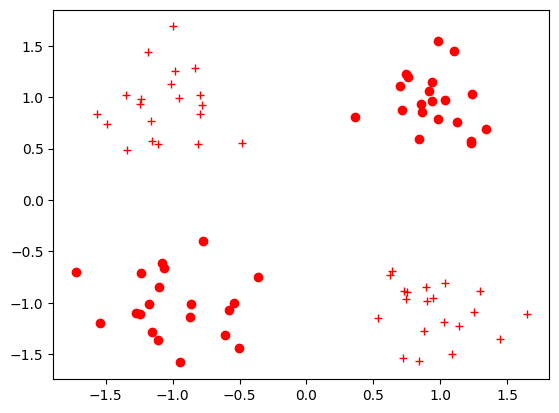

In [7]:
# 0, 1 => 전부 0번 레이블을 갖도록 바꾸기
# 2, 3 => 전부 1번 레이블 갖도록 바꾸기
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)


# 시각화
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor = 'none',
                    markeredgecolor = c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c = 'r')
plt.show()

이렇게 생긴 애는 y = wx + b 는 선형식이라 얘를 구분할 수 없다.
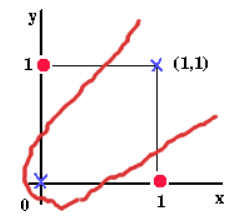
출처: stackoverflow  https://stackoverflow.com/questions/9600888/single-perceptron-non-linear-evaluating-function

이를 해결하기 위해선 Single layer 가 아닌 Multiple layer 를 사용해야한다.
(멀티플 레이어의 Error BackPropagation 을 사용해야한다고 하는데 일단 넘어가고 나중에 다시 와서 찾아보기)

hidden layer를 중간에 두어 깊이를 깊게 만들어보자 해서 만들어진 것이 **Deep Neural Netwark** 이다.

In [8]:
# 생성한 데이터를 넘파이 벡터에서 파이토치 텐서로 바꿔주기
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [9]:
# 신경망 모델을 구현.
# 파이토치에서 신경망은 보통 `torch.nn.Module`을 상속 받는 파이썬 클래스로 정의.
class NeuralNet(torch.nn.Module):
    # 생성자
    def __init__(self, input_size, hidden_size): 
        super(NeuralNet, self).__init__() # nn.Module 상속받은 걸로 초기화하기
        
        self.input_size = input_size # 신경망에 입력되는 데이터의 차원
        self.hidden_size = hidden_size # 신경망의 은닉층 크기
        
        # 입력된 데이터가 인공 신경망 통과하면서 거치는 연산들
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) # input_size 개를 받아서 hidden_size 개를 은닉층에 출력
        self.relu = torch.nn.ReLU() # 활성화함수로는 relu 를 쓴다
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1) # hidden_size 개를 입력받아서 1개 출력한다
        self.sigmoid = torch.nn.Sigmoid() # 활성화함수로는 sigmoid 쓴다
        
        
    # 위에서 만들어 놓은 애들 차례대로 실행하기
    def forward(self, input_tensor):
        # 입력데이터에 [input_size, hidden_size] 크기의 가중치를 행렬곱하고 편향 더해서 [1, hidden_size] 꼴의 텐서 반환.
        linear1 = self.linear_1(input_tensor) # 위에서 정의한 linear_1에 input_tensor 넣음
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

차례대로


> `[input_size, hidden_size]` - (linear1) -> `[1, hidden_size]` - (relu) -> `[1, hidden_size]` - (linear2) -> `[1, 1]`

이 마지막 텐서를 sigmoid에 넣으면 값 하나(0에서 1사이 값)을 반환해준다.


💡 참고링크: 파이토치 튜토리얼 https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html

📌 찾아보기: 활성화함수 종류 간단히 찾아보기

1. Relu
: Relu는 입력값이 음수면 0을, 양수면 입력값 그대로 출력해준다.

2. Sigmoid
: Sigmoid는 값을 0에서 1 사이로 제한해준다. .0과 1 중 어디에 가까운지 확인 -> 카테고리 분류

In [13]:
# 신경망 객체 생성
model = NeuralNet(2, 5) # input_size = 2, hidden_size = 5
lr = 0.03

# 오차 함수
# BCELoss() = 이진 교차 엔트로피
criterion = torch.nn.BCELoss()

epochs = 2000

# 학습에 사용할 최적화 알고리즘으로는 확률적 경사하강법(SGD) 선택
opt = torch.optim.SGD(model.parameters(), lr = lr)

# 모델 성능 평가
model.eval() # 평가 모드로 변경

# 모델의 결괏값과 레이블(y)의 차원 맞춰주기 위해 squueze로 펴줌.
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(f"Before Training, test loss is {test_loss_before.item()}")

Before Training, test loss is 0.7325138449668884


In [14]:
# 학습을 통한 성능 개선

for epoch in range(epochs):
    model.train() # 학습 모드로 변경
    opt.zero_grad() # epoch마다 새로운 경사값 계산해야하기 때문에 zero_grad() 사용해서 경삿값 0으로 설정.
    
    train_output = model(x_train) # 학습 데이터로 학습
    train_loss = criterion(train_output.squeeze(), y_train) # 결과값과 실제 정답과 비교해서 오차 계산
    
    # 학습 잘 되고 있는지 확인
    if epoch % 100 == 0:
        print(f"Train loss at {epoch} is {train_loss.item()}")
    
    # 오차 함수를 가중치로 미분해서 오차가 최소가 되는 방향으로 학습률만큼 이동하도록 하기
    # = 역전파
    train_loss.backward()
    opt.step()

Train loss at 0 is 0.7333998084068298
Train loss at 100 is 0.6719678640365601
Train loss at 200 is 0.6174373626708984
Train loss at 300 is 0.538774311542511
Train loss at 400 is 0.446634441614151
Train loss at 500 is 0.3636690378189087
Train loss at 600 is 0.29485586285591125
Train loss at 700 is 0.24171140789985657
Train loss at 800 is 0.20189854502677917
Train loss at 900 is 0.17150433361530304
Train loss at 1000 is 0.14800572395324707
Train loss at 1100 is 0.12949980795383453
Train loss at 1200 is 0.1147788017988205
Train loss at 1300 is 0.10291127860546112
Train loss at 1400 is 0.09321969002485275
Train loss at 1500 is 0.0852084830403328
Train loss at 1600 is 0.07850663363933563
Train loss at 1700 is 0.0728372186422348
Train loss at 1800 is 0.06799028813838959
Train loss at 1900 is 0.06380561739206314


In [16]:
# 학습 완료된 모델 성능 시험
model.eval() # 평가 모드로 변경
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f"After Training, test loss is {test_loss.item()}")

After Training, test loss is 0.061986129730939865


학습 완료된 모델 `state_dict()` 함수 형태로 바꾸고 `.pt` 파일로 저장하기.
* `state_dict()` : 모델 내 가중치들이 딕셔너리 형태로 `{연산이름: 가중치 텐서와 편향 텐서}`로 표현한 데이터

In [17]:
torch.save(model.state_dict(), './model.pt')
print(f"state_dict format of the model : {model.state_dict()}")

state_dict format of the model : OrderedDict([('linear_1.weight', tensor([[ 0.3503,  0.1310],
        [-1.7319, -1.8814],
        [ 0.1165,  0.0564],
        [ 1.9831,  1.8379],
        [-0.2900, -0.3082]])), ('linear_1.bias', tensor([ 1.0002, -0.5978,  0.9001, -0.2932, -0.0174])), ('linear_2.weight', tensor([[ 0.8015, -2.4831,  0.8068, -2.5721, -0.1969]])), ('linear_2.bias', tensor([2.1503]))])


In [18]:
# 새 모델 생성해서 학습한 모델 가중치 입력해보기
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [21]:
new_model.eval()
print(f"벡터 [-1 ,1]이 레이블 1을 가질 확률은 { new_model( torch.FloatTensor( [-1, 1] )).item()}")

벡터 [-1 ,1]이 레이블 1을 가질 확률은 0.9693503975868225
